# Alignment

This notebook demonstrates a simulated alignment using tike.

In [15]:
%env TIKE_BACKEND=numpy

env: TIKE_BACKEND=numpy


In [16]:
import importlib
import logging

import matplotlib.pyplot as plt
import numpy as np

import tike
import tike.align
import tike.view

In [17]:
for module in [tike, np]:
    print("{} is version {}".format(module.__name__, module.__version__))

tike is version 0.9.1.dev68+g8c51d09.d20200618
numpy is version 1.18.4


## Create test data

Make test data for the alignment problem.

### Define the object

In [18]:
amplitude = plt.imread("../../../tests/data/Cryptomeria_japonica-0128.png")
phase = plt.imread("../../../tests/data/Bombus_terrestris-0128.png") * np.pi
np.min(phase), np.max(phase)

(0.036959916, 3.1292727)

In [19]:
ntheta = 21  # number angular views
original = np.tile(amplitude * np.exp(1j * phase), (ntheta, 1, 1)).astype('complex64')
original.shape

(21, 128, 128)

(-0.9999241+0.012319642j) (0.99514693+0.09840028j)


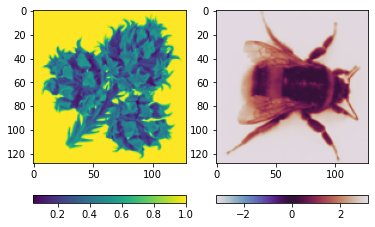

In [20]:
plt.figure()
tike.view.plot_phase(original[0])
plt.show()

### Define the shifts

Each image has a single shift direction in 2 dimensions.

In [21]:
np.random.seed(5)
shift = (np.random.rand(*original.shape[0:1], 2) - 0.5) * 0 + (4, 3)
shift.shape

(21, 2)

### Simulate the shifted images

In [22]:
data = tike.align.simulate(shift=shift, unaligned=original)
data.shape

(21, 128, 128)

(-0.9999241+0.01231963j) (0.99514693+0.09840029j)


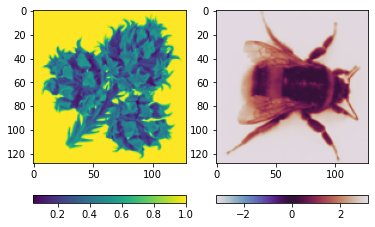

In [23]:
plt.figure()
tike.view.plot_phase(data[ntheta // 2])

## Reconstruct

Now we need to try and reconstruct psi.

In [24]:
# Provide initial guesses for parameters that are updated
result = {
}

In [25]:
logging.basicConfig(level=logging.INFO)

for i in range(1):
    result = tike.align.reconstruct(
        data=data,
        unaligned=original,
        algorithm='farneback',
        **result,
        num_iter=1,
        upsample_factor=100,
    )

INFO:tike.align.align:farneback on 21 - 128 by 128 images for 1 iterations.


In [26]:
result['shift'][:, 64, 64, :]

array([[-3.5648142e-07, -6.4512324e-07],
       [-3.5648142e-07, -6.4512324e-07],
       [-3.5648142e-07, -6.4512324e-07],
       [-3.5648142e-07, -6.4512324e-07],
       [-3.5648142e-07, -6.4512324e-07],
       [-3.5648142e-07, -6.4512324e-07],
       [-3.5648142e-07, -6.4512324e-07],
       [-3.5648142e-07, -6.4512324e-07],
       [-3.5648142e-07, -6.4512324e-07],
       [-3.5648142e-07, -6.4512324e-07],
       [-3.5648142e-07, -6.4512324e-07],
       [-3.5648142e-07, -6.4512324e-07],
       [-3.5648142e-07, -6.4512324e-07],
       [-3.5648142e-07, -6.4512324e-07],
       [-3.5648142e-07, -6.4512324e-07],
       [-3.5648142e-07, -6.4512324e-07],
       [-3.5648142e-07, -6.4512324e-07],
       [-3.5648142e-07, -6.4512324e-07],
       [-3.5648142e-07, -6.4512324e-07],
       [-3.5648142e-07, -6.4512324e-07],
       [-3.5648142e-07, -6.4512324e-07]], dtype=float32)

In [27]:
shift

array([[-0.,  0.],
       [-0.,  0.],
       [-0.,  0.],
       [ 0.,  0.],
       [-0., -0.],
       [-0.,  0.],
       [-0., -0.],
       [ 0., -0.],
       [-0., -0.],
       [ 0.,  0.],
       [ 0., -0.],
       [-0., -0.],
       [-0., -0.],
       [-0.,  0.],
       [ 0., -0.],
       [-0., -0.],
       [ 0.,  0.],
       [-0.,  0.],
       [-0.,  0.],
       [ 0.,  0.],
       [-0.,  0.]])

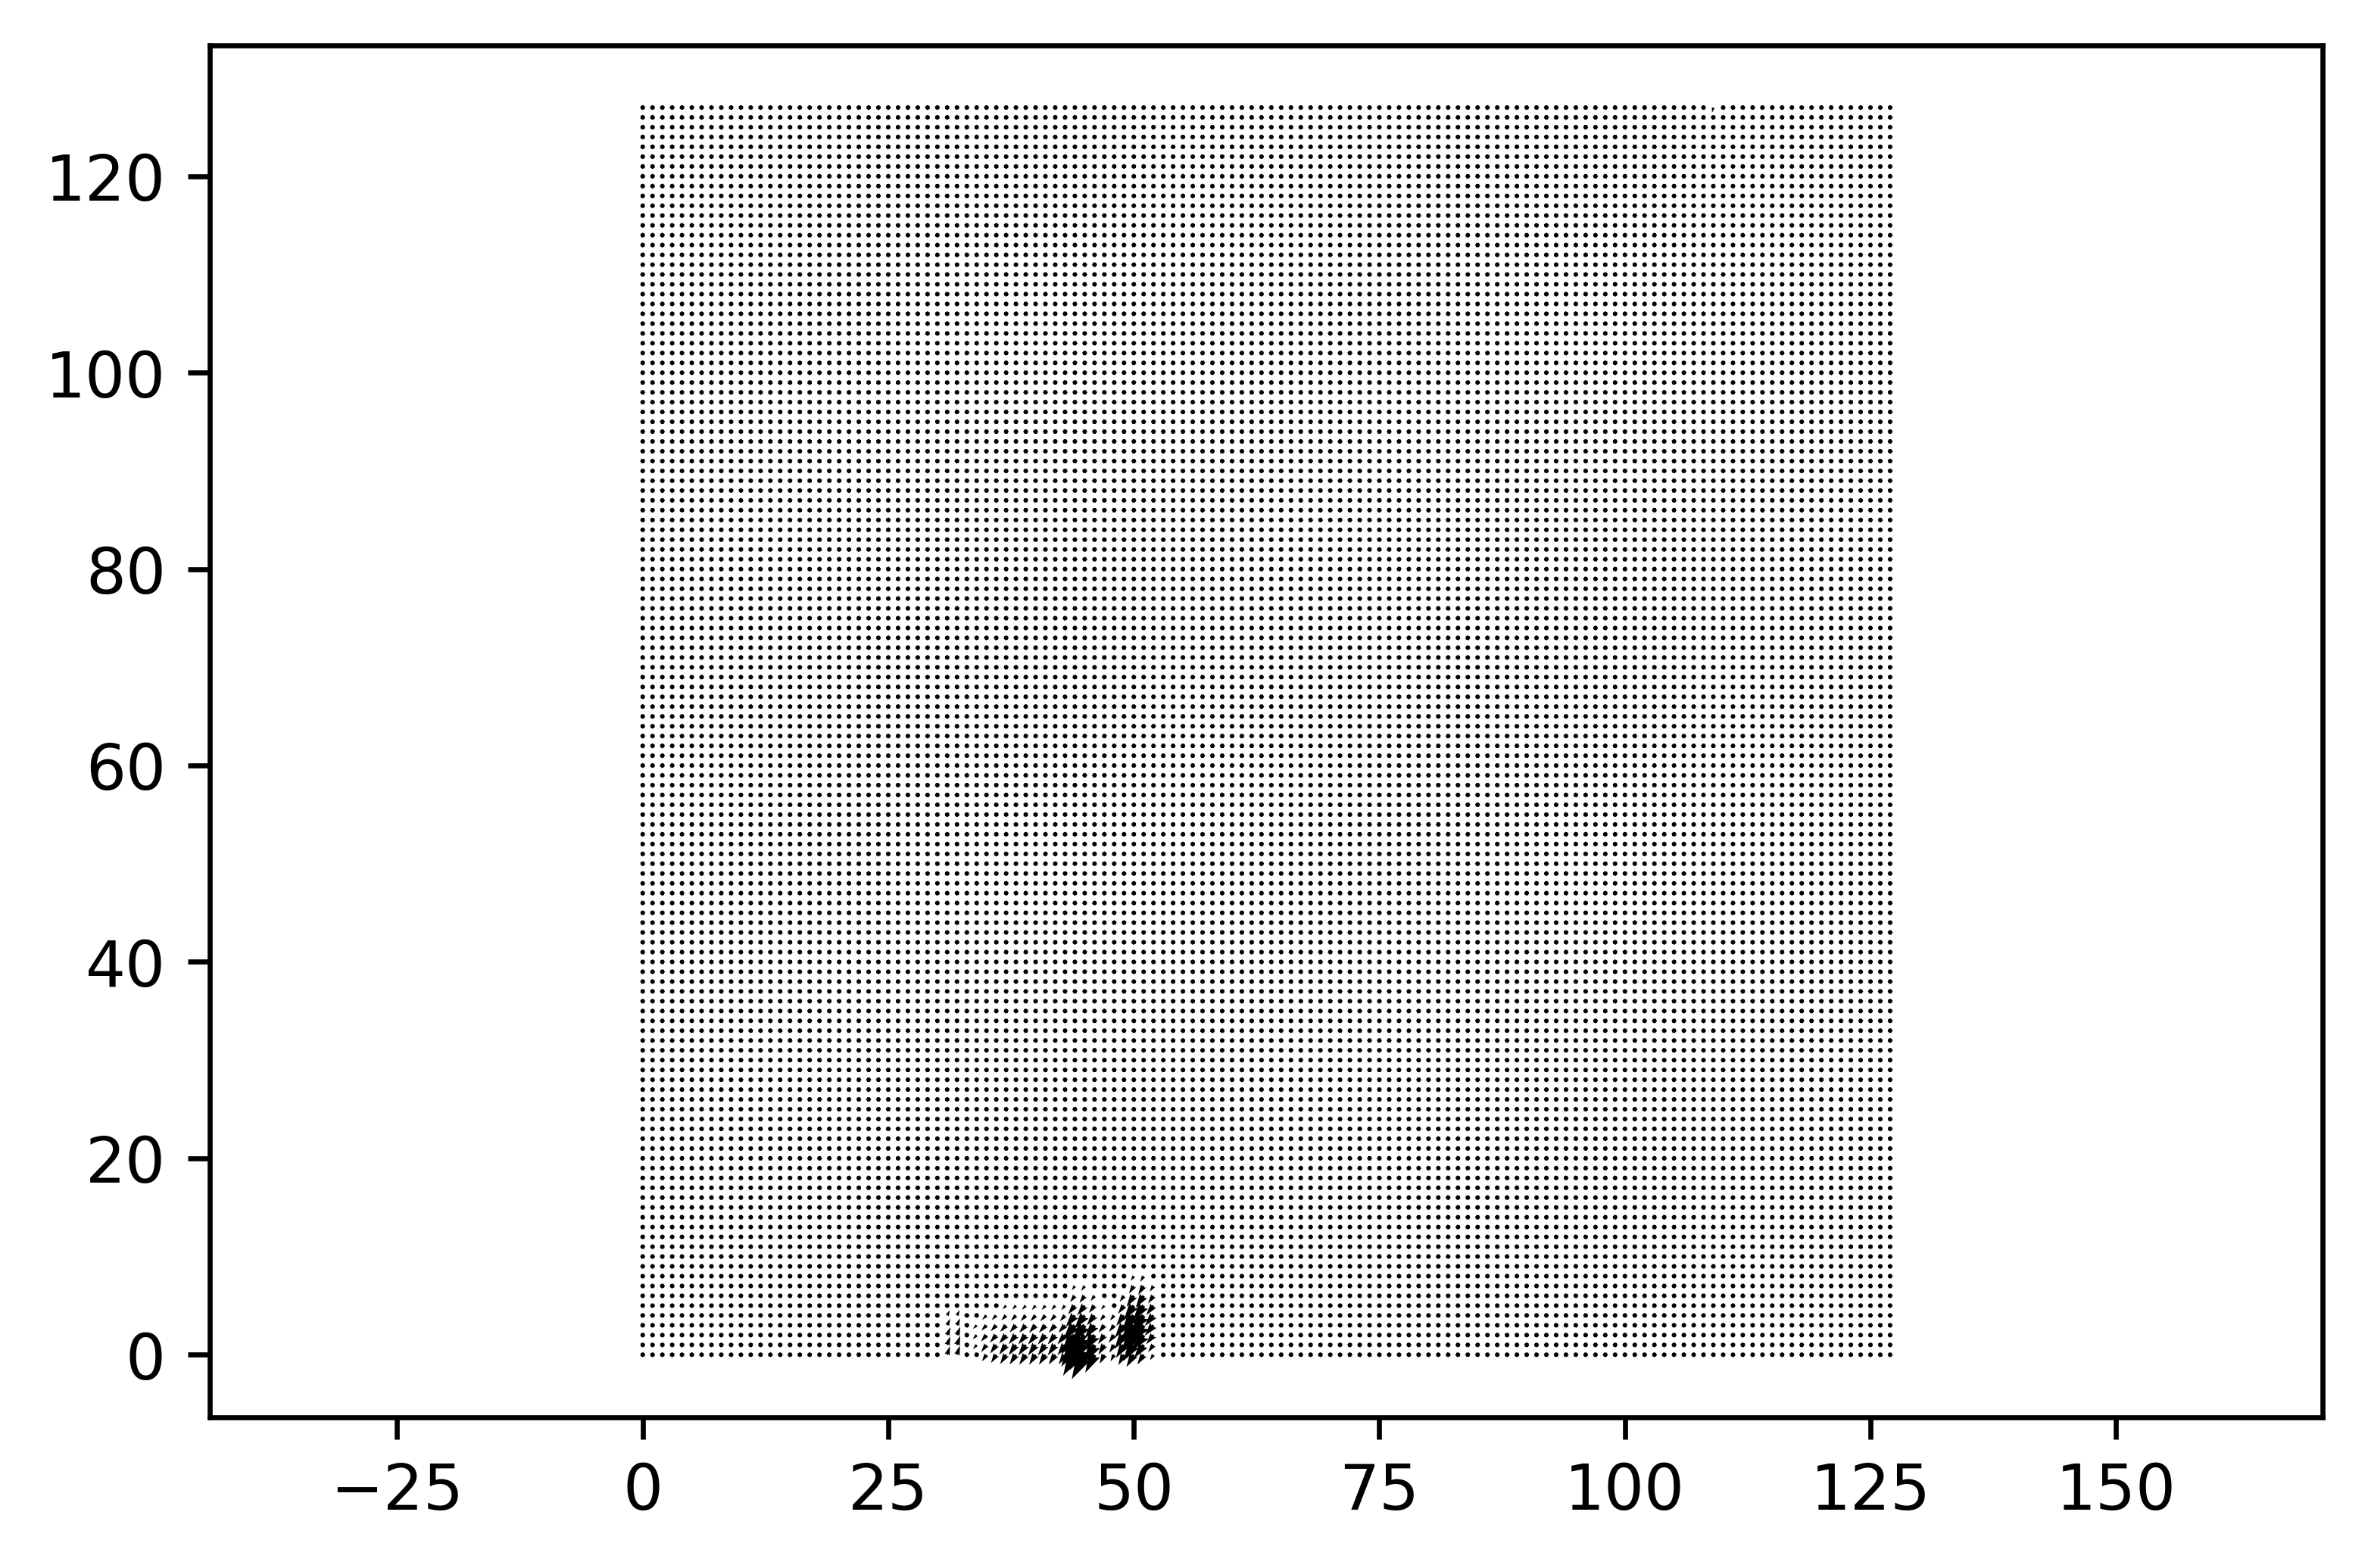

In [32]:
plt.figure(dpi=600)
u, v = result['shift'][ntheta // 2][..., 0], result['shift'][ntheta // 2][..., 1]
plt.quiver(u, v, scale=1)
plt.axis('equal')
plt.show()